# Electric field mapping

Correction proposed by B.DILLMANN (22/02/2021)

In this notebook companion we will program Electric field vector distributions produced from charges.

This notebooks aim at developing a **practical** sense of the electrostatic/magnetostatic field mapping. Do not give up because the code looks too complex. You are guided by questions that focus mostly on the physics of the lecture on *"Fundamental Interactions"*. These lessons are illustrated by some python code we are going to put hands on.

Remember:

- Make your personal copy of this document by renaming it.
- Give a proper answer in the markdown cell that immediately follows the questions. Check that the answer number is correct. The mark "**Answer n:**" should never be removed. This is crucial to fetch the corrections. 
- It proves to be necessary to modify the code cells: You need extra testing so do not hesitate to copy pieces of code that you understand.
- The cells contain variables and these will not be initialized unless executed one after the other. Do not try to execute the last cell first.
- The code is written with the same structure always, putting the declaration of the constants first on the cell, and the visual display at the end.
- This code has been tested successfully with python 3.6 in early 2021.

# The Electric monopole



In [1]:
import numpy as np # numerical library
import matplotlib.pyplot as plt # Visualization with Python
from matplotlib.patches import Circle # To model a point charge
# Next line is to remove an error warning at point (0,0)
np.seterr(divide='ignore', invalid='ignore')
# Do not take care at the output

{'divide': 'warn', 'over': 'warn', 'under': 'ignore', 'invalid': 'warn'}

In [2]:
# Physical constants to define electric fields quantitatively:

q0 = 1.0 # in Coulomb (A.s)
epsilon0 = 8.854187817e-12 # in Farad per meter (F.m−1)

Q_epsilon0=q0/(4.0*np.pi*epsilon0) # A Factor in SI:[I]-1 [T]-3 [M]1 [L]3

# All distances are given in meters

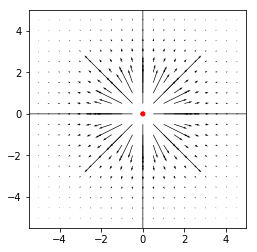

In [3]:
# We start giving data 
# Field of view:
X = np.arange(-5, 5, 0.5)
Y = np.arange(-5, 5, 0.5)
U, V = np.meshgrid(X, Y)

# Calulation of the distance between a point M and the place where the charge is


r=(U**2+V**2)**0.5

# Display for vizualisation only
fig, ax = plt.subplots()
q = ax.quiver(X, Y, U/r**3, V/r**3)

# Add filled circles for the charges themselves
ax.add_artist(plt.Circle((0, 0), 0.1, color='r'))
ax.set_aspect('equal')
plt.show()

#### Question 1: 
Which frame of coordinates best suits to analyse the Voltage distribution linked to this field pattern ?

Response here (as a Markdown you can use LaTex syntax).

Answer 1:

### BEGIN ANSWER
For symmetry reasons **polar coordinates** suits for all problems involving 2D and a single point at the origin. 
___

This is because it is a two dimensional distribution, whereby voltage distribution is determined by distance from a reference point $r$ and an angle from a reference direction $\theta$.

### END ANSWER

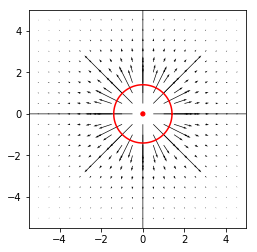

In [4]:
# We recal the matric from previous calulations done
fig, ax = plt.subplots()
q = ax.quiver(X, Y, U/r**3, V/r**3)

theta = np.linspace(0,2*np.pi,100)
x=1.4*np.cos(theta)
y=1.4*np.sin(theta)

plt.plot(x,y,'r-')

# Add filled circles for the charges themselves
ax.add_artist(plt.Circle((0, 0), 0.1, color='r'))
ax.set_aspect('equal')
plt.show()

#### Question 2: 
The preceding plot corresponds to a defined potential called $V_{circle}$ corresponding to the voltage seen by an elementary charge $q_0$ positioned at the red dot, what is the characteristic and the value of $V_{circle}$ 

Explain here bellow giving the python code used to calculate this potential.

Answer 2:

### BEGIN ANSWER

This questions requires to consider the following definition of potential V such as:

$$ \vec{E}=-\vec{\nabla}V $$

In this case $V$ will depend only on the radial coordinates. Nontheless it is important to remember following key rules for such problems, otherwise they can seem ill defined.

    - Infinitly small charge point would give an infinilely high voltage, this is neither physical nor numerically possible, conditions allways apply to keep this situation away from physics.
    
    - Differential operators when itegrated may give rise to the integration constants, these are part of the physical problem, and are definded as "Boundary Conditions".
    
    - Boundary Conditions prevent you to reach infinite. That is a great news: at the ends mathematics are the perfect tool for physics and numerical applications can bring realistic numbers to your problems. 

In [5]:
#### BEGIN CORRECTION

##The potential energy of a point charge is calculated as follows.
## The formula is v-vo = -kQ/r
## and vo will be assumed to be the Boundary Condition on voltage
##lets import the library to use.

from scipy.integrate import quad

k=8.99*10*9 ##in N.M2/C*2  coulombs constant
Q=1.6*10**-19 ## in coulombs (c)

ra=0   ## The center point at the location of charge
rb=1.4 ## Must be the distance from the reference point in space

r=1 # Initialize variable

def f(r):
    """
    Requires Q and k to be defined
    Function giving the electric field of a point charge Q
    """
    return (k*Q)/r**2

volt,err=quad(f,ra,rb)

print("V=",volt,"volts")

#### END CORRECTION

V= 2.5470320276253616e-13 volts


Note the usage of `quad` is a very good choice, since it is the workhorse of SciPy’s integration functions.

$$ U_{ab}= V_a-V_b=\int_{r_a}^{r_b} E(r)dr$$

Nevertheless you need to work around the way a function is handling its arguments, here the argument in the distance from the positive charge also called $r$.

### END ANSWER

# The Electric dipole

In [6]:
# With two charges of equal but opposite charge

# We start giving data 
# Field of view:
X = np.arange(-5, 5, 0.5)
Y = np.arange(-5, 5, 0.5)
U, V = np.meshgrid(X, Y)

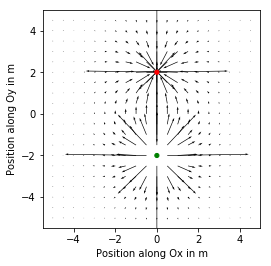

In [7]:
s=np.shape(U)
ONE=np.ones(s)

# Location of the first charge qo at (0,2)
U1=U
V1=V+2*ONE
r1=(U1**2+V1**2)**0.5

Ex1=U1/r1**3
Ey1=V1/r1**3

# Location of the second charge qo at (0,-2)
U2=U
V2=V-2*ONE
r2=(U2**2+V2**2)**0.5

Ex2=U2/r2**3
Ey2=V2/r2**3

# Application of the superposition principle 
# in order to calculate the electric field distribution
Ex=Ex1-Ex2
Ey=Ey1-Ey2

# Graphical dispaly to visualize the field in the Oxy plane
fig, ax = plt.subplots()
q = ax.quiver(X, Y, Ex, Ey)

ax.add_artist(plt.Circle((0, -2), 0.1, color='g'))
ax.add_artist(plt.Circle((0, 2), 0.1, color='r'))
ax.set_aspect('equal')
plt.xlabel("Position along Ox in m")
plt.ylabel("Position along Oy in m")
plt.show()

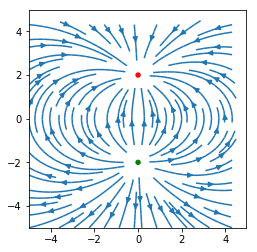

In [8]:
fig = plt.figure()
ax = fig.add_subplot(111)

ax.streamplot(X,Y,Ex,Ey)
ax.add_artist(plt.Circle((0, -2), 0.1, color='g'))
ax.add_artist(plt.Circle((0, 2), 0.1, color='r'))
ax.set_aspect('equal')
plt.show()

#### Question 3:
What is the value of the electric field along a line passing by the two charges of opposite sign ?

Answer 3:

### BEGIN ANSWER

This question aims to check if you know the literal formula of the electric field. 

This questions requires to consider the projection of  $\vec{E}$ along the vector such as:

$$ E = \frac{1}{4\pi\epsilon_o}.\frac{q_0}{r^2} $$

In this case 

    - Always write the variables to be applied by the formula to declare them prior usage of the equation.
    
    - Never forget that Units are the core of Physics, and each result deserves some meaning.
    
    - The field is maximum in magnitude. The sign minus is interseting when you need to compare algebraic values, otherwise justify it.
    
    - Solve problems in vacuum when nothing else is specified. 
    

In [9]:
### BEGIN CORRECTION

epsilon0 = 8.854187817e-12 # in Farad per meter (F.m−1)


q0 = 1.0 # in Coulomb (A.s)
q1=-q0   # useless since it will not be used unless the force is asked
r=(2-(-2)) # Distance between the two charges in meters


E=1/(4.0*np.pi*epsilon0)*q0/r**2

print("The value directly calulated from literal expression is E={:.2f} 1E9 V/m".format(E/1E9))
print("This field corresponds to half a billions of volts per meter \r\n because a charge of one coulombs corresponds to a significantly high amount of electrons")

### END CORRECTION

The value directly calulated from literal expression is E=0.56 1E9 V/m
This field corresponds to half a billions of volts per meter 
 because a charge of one coulombs corresponds to a significantly high amount of electrons


#### Question 4: 
Propose a calculation to locate the position of the equipotential line of zero volts. Called $V=0$, which function can you use to plot this equipotential ?

Answer 4:


### BEGIN ANSWER

Note that there is **not** such approximation, that would tend to assimilate the dipole (two charges) as a single origin for the distribution. We are not in the far-field but in the near field. 

In [10]:
### BEGIN CORRECTION
 
q,eps0 = 1.602E-19 , 8.854E-12 # Initalize constants as a tuple
# Dipole +q,-q distance(m)and a convinient combination of parameters

d = 4 # Distance was fixed to 4 m

k =1/4/np.pi/eps0* q 

# Cartesian axis system with origin at the dipole(m)
X = np.linspace(-5,5,100)
Y = X.copy()
X, Y = np.meshgrid(X,Y)

# This gives the distribution for one single charge


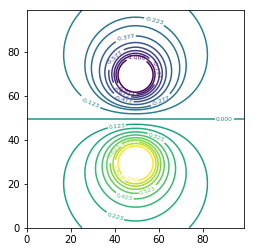

In [11]:
# Dipole electrostatic potential(V),
# using point dipole approximation is not acceptable 
# if you whant to locate the position of the equipotential "0"
s=np.shape(X)
ONE=np.ones(s)

# Location of the first charge qo at (0,2)
X1=X
Y1=Y+2*ONE

# Location of the second charge qo at (0,-2)
X2=X
Y2=Y-2*ONE

# We make use of hypot because it calulates 
# the norm (distances) for all the points of a matrix

phi1 = 1/np.hypot(X1,Y1)
phi2 = -1/np.hypot(X2,Y2)

phi=phi1+phi2

fig, ax  = plt.subplots()


levels=np.array([-1.0, -0.87723722, -0.77723722, -0.67723722, -0.57723722,
       -0.47723722, -0.37723722, -0.27723722, -0.22276278, -0.12276278,
        0,  0.12276278,  0.22276278,  0.32276278,  0.42276278,
        0.52276278,  0.62276278,  0.72276278,  0.82276278,  1.0])
CS = ax.contour(phi, levels)

ax.clabel(CS, inline=1, fontsize=6)
ax.set_aspect('equal')

plt.show()



There is only one equipotential that is complettely straight, this is the equipotential called $V=0$.

Note that when comming close to the location of the charges, the equipotential becomes a fammily circles, also know as the *apolonian circles*, so the point charge can be replaced by a circle of equal voltage.


# Concluding remarks

One should be very carfull of the **boudary conditions**, if not properly defined by the nature of the problem they will be imposed by the numerical tool to do the calculation. The last figure proves that the point charges can be well replaced by surfaces of spherical shape (circles in 2D) with a definite **potential** on their surface, that will serve as boundrary condition in the resolution of the integration of electric field.